# Data Mining - K-Nearest Neighbor
Data Mining I expands predictive modeling into nonlinear dimensions, enhancing the capabilities and effectiveness of the data analytics lifecycle. In this course, learners implement supervised models—specifically classification and prediction data mining models—to unearth relationships among variables that are not apparent with more surface-level techniques. The course provides frameworks for assessing models’ sensitivity and specificity.

## Competencies 
__Classification Data Mining Models__ <br>
Applies observations to appropriate classes and categories using classification models. 

__Predictive Data Mining Models__ <br>
Implements prediction data mining models to find hard-to-spot relationships among variables.

__Data Mining Model Performance__ <br>
Evaluates data mining model performance for precision, accuracy, and model comparison.

## Write Up
__Research Question__<br>
Can the classification method K-Nearest Neighbor be used to predict readmission of patients? 

__Goal__<br>
One goal of the data analysis is to determine if the K-Nearest Neighbors classification method can produce a model that can predict readmission of patients. 

__Explanation of Classification Method__<br>
The classification method I chose is K-Nearest Neighbor. This method classifies, “a record in accordance with how similar records are classified.” (Bruce et al, 2020) K-Nearest Neighbor works by calculating the distance of a test observation from other observations within the dataset and then finding the data points label, “by looking at the ‘k’ closest labeled data point and getting them to vote on what the unlabeled point should have.” (Elleh, 2022) The distance calculation used is called Euclidean distance and is used to calculate the distance between the data points mentioned above. The expected outcome will be a model that can make accurate predictions for the target categorical variable readmission of patients.

__Summary of Method Assumption__<br>
One assumption of the K-Nearest Neighbors classification method is, “The K-nearest neighbors classification method assumes that similar things exist in proximity to each other.” (Elleh, 2022) This assumption is important as the basis of K-NN is classifying a record in accordance with how similar records are classified so we must assume that close records are similar. 

## Code

In [1]:
# Importing packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
import seaborn as sns

In [2]:
# Importing medical data CSV and creating the medical_data DataFrame
medical_data = pd.read_csv("C:/Users/Makayla Avendano/Desktop/medical_clean.csv")

In [3]:
# Looking at columns, non-null counts and data types 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Drop columns that are not needed 
medical_data = medical_data.drop(columns=['Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'Marital', 'TimeZone', 'Job', 'CaseOrder', 'Customer_id','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8'])

In [5]:
# Updated data frame 
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Children            10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Gender              10000 non-null  object 
 4   ReAdmis             10000 non-null  object 
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   Full_meals_eaten    10000 non-null  int64  
 8   vitD_supp           10000 non-null  int64  
 9   Soft_drink          10000 non-null  object 
 10  Initial_admin       10000 non-null  object 
 11  HighBlood           10000 non-null  object 
 12  Stroke              10000 non-null  object 
 13  Complication_risk   10000 non-null  object 
 14  Overweight          10000 non-null  object 
 15  Arthritis           10000 non-null  object 
 16  Diabe

In [6]:
# Duplicates 
medical_duplicates = medical_data.duplicated()
print(medical_duplicates.value_counts())

False    10000
Name: count, dtype: int64


In [7]:
# Missing Values 
# Sum of all null values within each column 
medical_data.isnull().sum()

Children              0
Age                   0
Income                0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charges    0
dtype: int64

<Axes: >

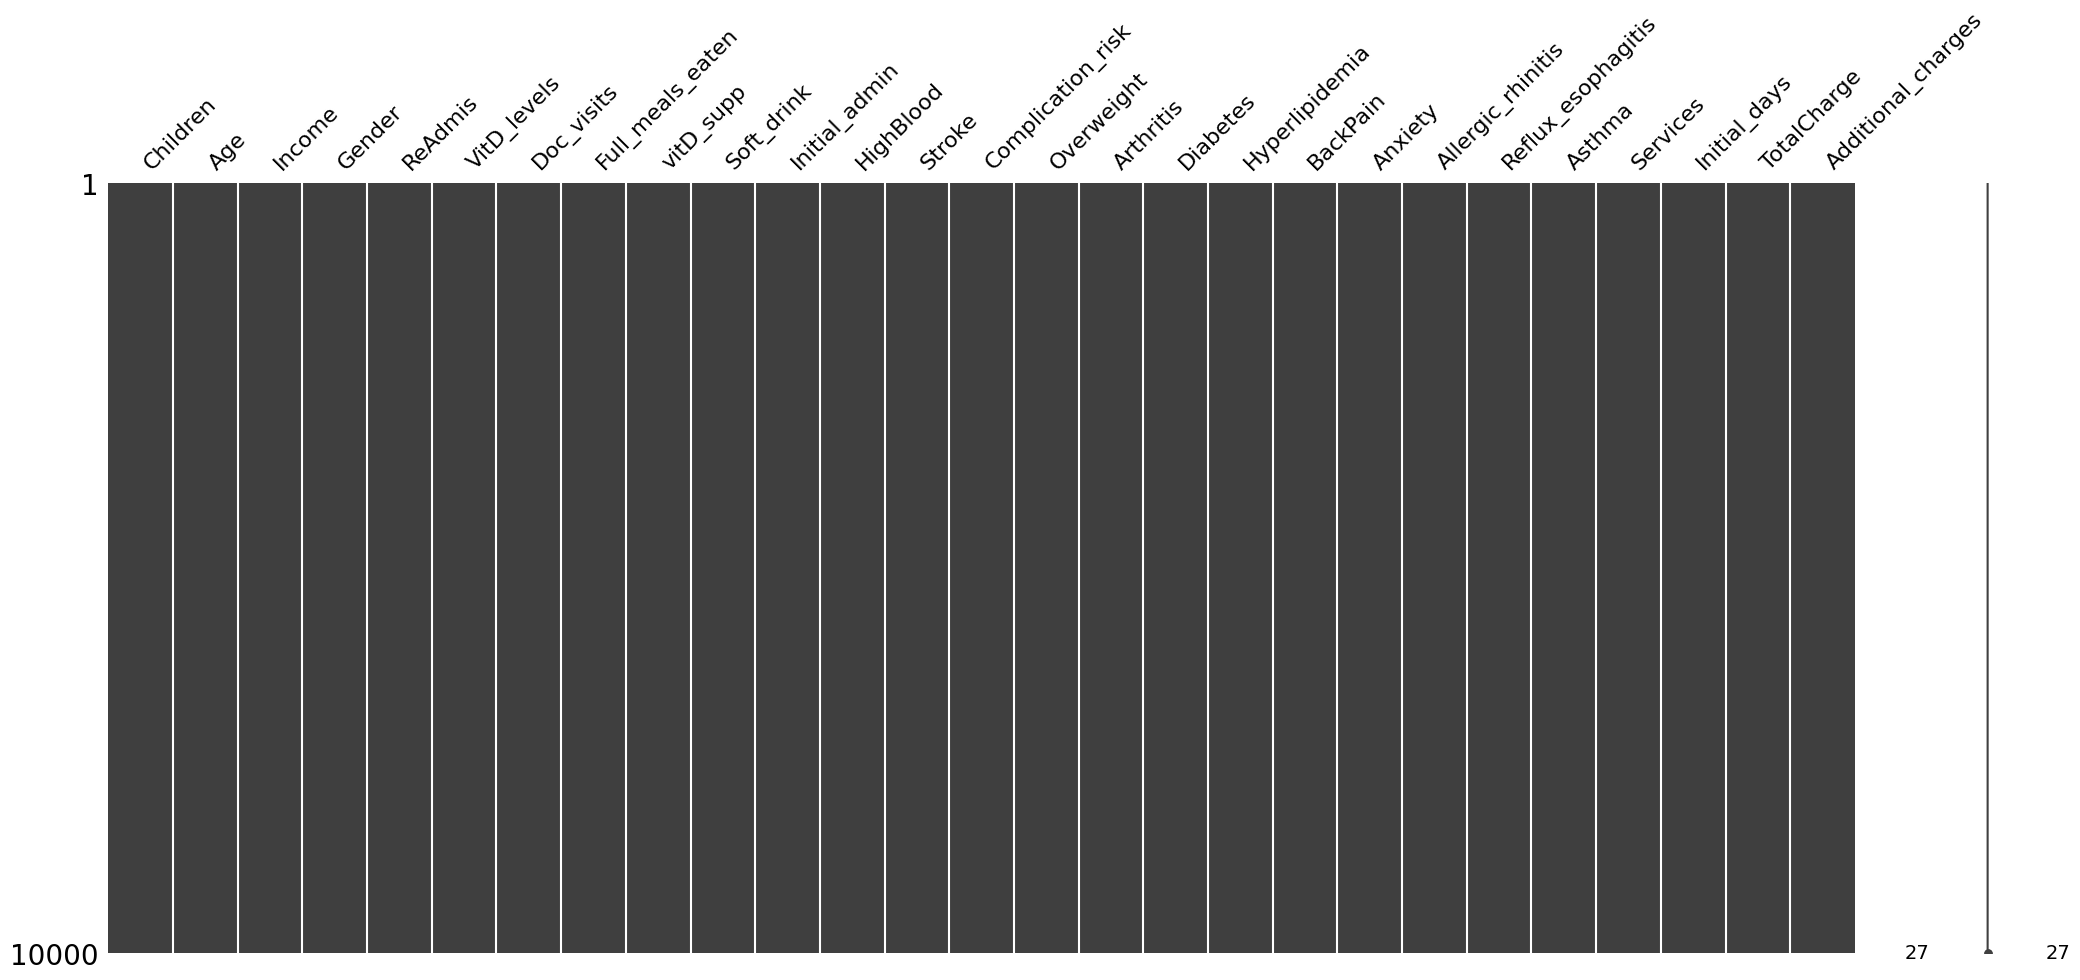

In [8]:
# Double checking no missing values 
msno.matrix(medical_data) 

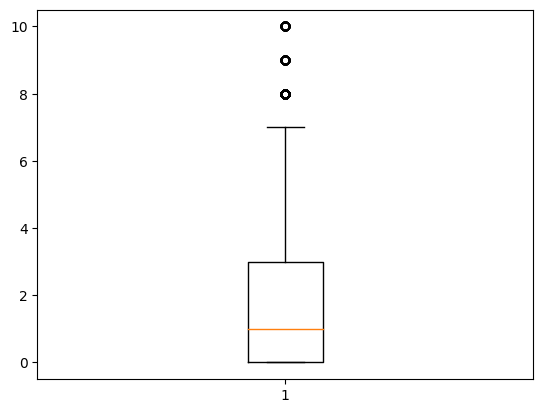

In [9]:
# Outliers
ChildrenPlot = plt.boxplot(x='Children', data = medical_data)

In [10]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_children = np.percentile(medical_data['Children'], 75)
Q1_children = np.percentile(medical_data['Children'], 25)
IQR_children = Q3_children - Q1_children
Max_children = Q3_children + (1.5 * IQR_children)
print(Max_children)

7.5


In [11]:
# Replacing with the median
median = float(medical_data['Children'].median())
medical_data['Children'] = np.where(medical_data['Children'] > Max_children, median, medical_data['Children'])

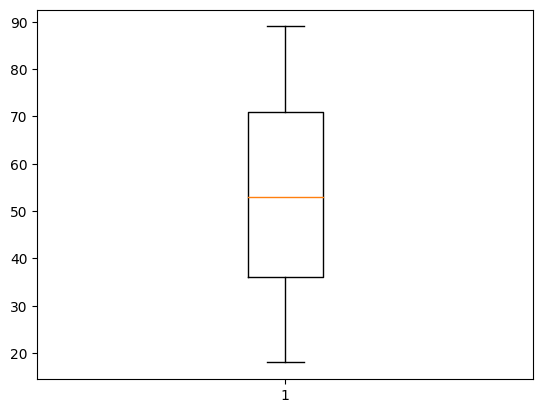

In [12]:
AgePlot = plt.boxplot(x='Age', data = medical_data)

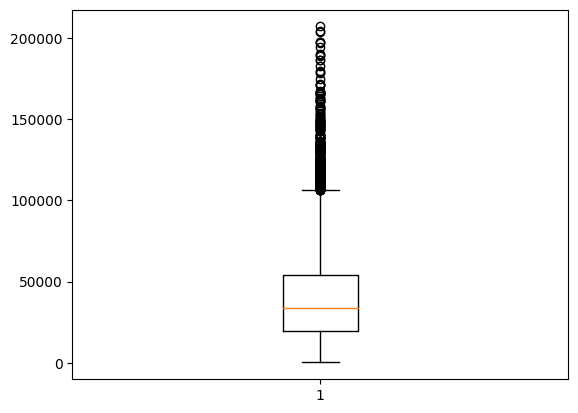

In [13]:
IncomePlot = plt.boxplot(x='Income', data = medical_data)

In [14]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_income = np.percentile(medical_data['Income'], 75)
Q1_income = np.percentile(medical_data['Income'], 25)
IQR_income = Q3_income - Q1_income
Max_income = Q3_income + (1.5 * IQR_income)
print(Max_income)

106342.84374999999


In [15]:
# Replacing with the median
median = float(medical_data['Income'].median())
medical_data['Income'] = np.where(medical_data['Income'] > Max_income, median, medical_data['Income'])

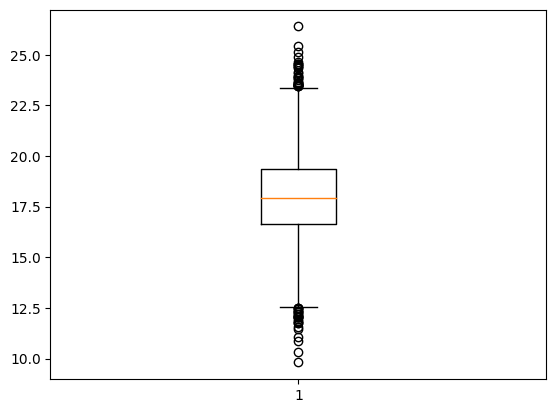

In [16]:
VitDlevelsplot = plt.boxplot(x='VitD_levels', data = medical_data)

In [17]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_vitd = np.percentile(medical_data['VitD_levels'], 75)
Q1_vitd = np.percentile(medical_data['VitD_levels'], 25)
IQR_vitd = Q3_vitd - Q1_vitd
Max_vitd = Q3_vitd + (1.5 * IQR_vitd)
rounded_max_vitd = round(Max_vitd,1)
print(rounded_max_vitd)

23.4


In [18]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (lower outliers) 
Q3_vitd = np.percentile(medical_data['VitD_levels'], 75)
Q1_vitd = np.percentile(medical_data['VitD_levels'], 25)
IQR_vitd = Q3_vitd - Q1_vitd
Min_vitd = Q1_vitd - (1.5 * IQR_vitd)
rounded_min_vitd = round(Min_vitd,1)
print(rounded_min_vitd)

12.5


In [19]:
# Replacing with the median
median = float(medical_data['VitD_levels'].median())
medical_data['VitD_levels'] = np.where(medical_data['VitD_levels'] > rounded_max_vitd, median, medical_data['VitD_levels'])

In [20]:
# Replacing with the median
median = float(medical_data['VitD_levels'].median())
medical_data['VitD_levels'] = np.where(medical_data['VitD_levels'] < rounded_min_vitd, median, medical_data['VitD_levels'])

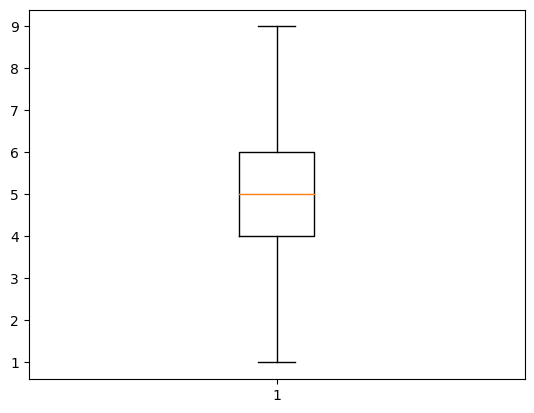

In [21]:
Docvisitsplot = plt.boxplot(x='Doc_visits', data = medical_data)

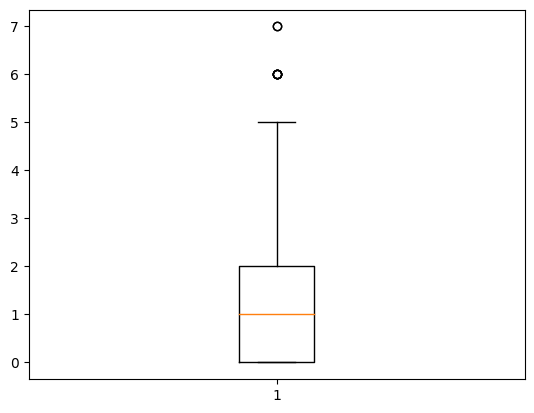

In [22]:
Fullsmealseatenplot = plt.boxplot(x='Full_meals_eaten', data = medical_data)

In [23]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_meals = np.percentile(medical_data['Full_meals_eaten'], 75)
Q1_meals = np.percentile(medical_data['Full_meals_eaten'], 25)
IQR_meals = Q3_vitd - Q1_vitd
Max_meals = Q3_vitd + (1.5 * IQR_vitd)
rounded_max_meals = round(Max_meals,1)
print(rounded_max_meals)

23.4


In [24]:
# Replacing with the median
median = float(medical_data['Full_meals_eaten'].median())
medical_data['Full_meals_eaten'] = np.where(medical_data['Full_meals_eaten'] > rounded_max_meals, median, medical_data['Full_meals_eaten'])

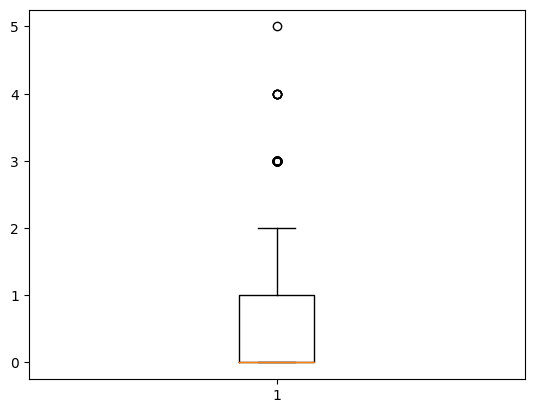

In [25]:
VitDSuppplot = plt.boxplot(x='vitD_supp', data = medical_data)

In [26]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_supp = np.percentile(medical_data['vitD_supp'], 75)
Q1_supp = np.percentile(medical_data['vitD_supp'], 25)
IQR_supp = Q3_supp - Q1_supp
Max_supp = Q3_supp + (1.5 * IQR_supp)
rounded_max_supp = round(Max_supp,1)
print(rounded_max_supp)

2.5


In [27]:
# Replacing with the median
median = float(medical_data['vitD_supp'].median())
medical_data['vitD_supp'] = np.where(medical_data['vitD_supp'] > rounded_max_supp, median, medical_data['vitD_supp'])

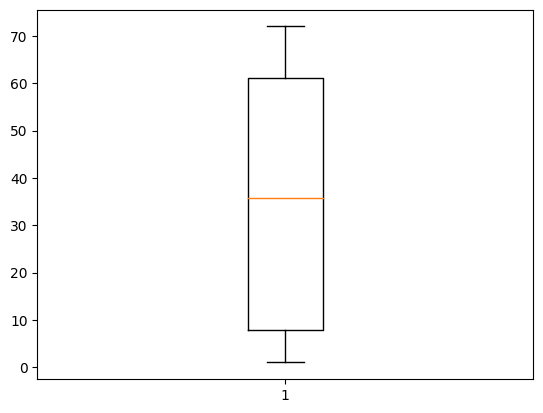

In [28]:
Initialdaysplot = plt.boxplot(x='Initial_days', data = medical_data)

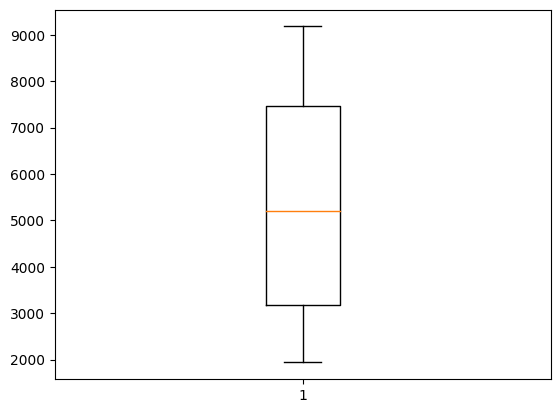

In [29]:
TotalChargePlot = plt.boxplot(x='TotalCharge', data = medical_data)

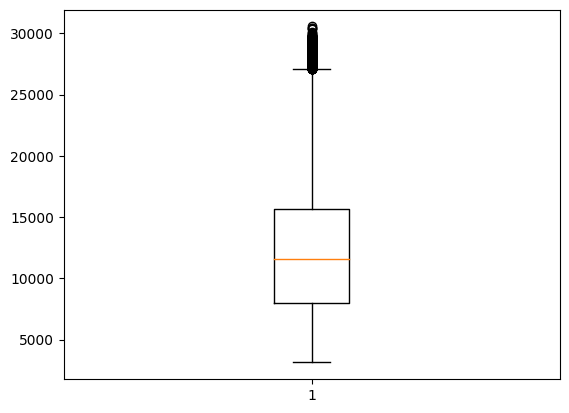

In [30]:
AddPlot = plt.boxplot(x='Additional_charges', data = medical_data)

In [31]:
# Treat outliers with imputation - Finding the maximuim value for the box plot (upper outliers) 
Q3_add = np.percentile(medical_data['Additional_charges'], 75)
Q1_add = np.percentile(medical_data['Additional_charges'], 25)
IQR_add = Q3_add - Q1_add
Max_add = Q3_add + (1.5 * IQR_add)
rounded_max_add = round(Max_add,1)
print(rounded_max_add)

27086.5


In [32]:
# Replacing with the median
median = float(medical_data['Additional_charges'].median())
medical_data['Additional_charges'] = np.where(medical_data['Additional_charges'] > rounded_max_add, median, medical_data['Additional_charges'])

In [33]:
# Exploratory
# EDA - Looking at descriptive statistics
medical_data.describe()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.779900,53.511700,37355.193095,17.958778,5.012200,1.001400,0.377200,34.455299,5312.172769,12224.131644
std,1.673361,20.638538,22986.930317,1.962375,1.045734,1.008117,0.586306,26.309341,2180.393838,5683.843249
min,0.000000,18.000000,154.080000,12.507730,1.000000,0.000000,0.000000,1.001981,1938.312067,3125.703000
25%,0.000000,36.000000,19598.775000,16.642449,4.000000,0.000000,0.000000,7.896215,3179.374015,7986.487755
50%,1.000000,53.000000,33766.005000,17.951074,5.000000,1.000000,0.000000,35.836244,5213.952000,11573.938868
75%,3.000000,71.000000,51024.942500,19.325515,6.000000,2.000000,1.000000,61.161020,7459.699750,14654.504410
max,7.000000,89.000000,106220.500000,23.363658,9.000000,7.000000,2.000000,71.981490,9180.728000,27059.629700


In [34]:
# Qualitative/categorical descriptive data
medical_data.describe(include='object')

,Gender,ReAdmis,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,Female,No,No,Emergency Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,5018,6331,7425,5060,5910,8007,4517,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


In [35]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['ReAdmis_numeric'] = medical_data['ReAdmis']
# 2. Create dictionary for the values 
dict_readmis = {"ReAdmis_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dict_readmis, inplace = True)

In [36]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['HighBlood_numeric'] = medical_data['HighBlood']
# 2. Create dictionary for the values 
dict_highblood = {"HighBlood_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dict_highblood, inplace = True)

In [37]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Soft_drink_numeric'] = medical_data['Soft_drink']
# 2. Create dictionary for the values 
dict_soft = {"Soft_drink_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dict_soft, inplace = True)

In [38]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Stroke_numeric'] = medical_data['Stroke']
# 2. Create dictionary for the values 
dictstroke = {"Stroke_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictstroke, inplace = True)

In [39]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Overweight_numeric'] = medical_data['Overweight']
# 2. Create dictionary for the values 
dictover = {"Overweight_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictover, inplace = True)

In [40]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Arthritis_numeric'] = medical_data['Arthritis']
# 2. Create dictionary for the values 
dictarth = {"Arthritis_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictarth, inplace = True)

In [41]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Diabetes_numeric'] = medical_data['Diabetes']
# 2. Create dictionary for the values 
dictdib = {"Diabetes_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictdib, inplace = True)

In [42]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Hyperlipidemia_numeric'] = medical_data['Hyperlipidemia']
# 2. Create dictionary for the values 
dicthyp = {"Hyperlipidemia_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dicthyp, inplace = True)

In [43]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['BackPain_numeric'] = medical_data['BackPain']
# 2. Create dictionary for the values 
dictback = {"BackPain_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictback, inplace = True)

In [44]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Anxiety_numeric'] = medical_data['Anxiety']
# 2. Create dictionary for the values 
dictanx = {"Anxiety_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictanx, inplace = True)

In [45]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Allergic_rhinitis_numeric'] = medical_data['Allergic_rhinitis']
# 2. Create dictionary for the values 
dictallerg = {"Allergic_rhinitis_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictallerg, inplace = True)

In [46]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Reflux_esophagitis_numeric'] = medical_data['Reflux_esophagitis']
# 2. Create dictionary for the values 
dictreflux = {"Reflux_esophagitis_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictreflux, inplace = True)

In [47]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Asthma_numeric'] = medical_data['Asthma']
# 2. Create dictionary for the values 
dictasthma = {"Asthma_numeric": {"Yes": 1, "No": 0}}
medical_data.replace(dictasthma, inplace = True)

In [48]:
# Data Wrangling 
# 1. Create new column to input into 
medical_data['Complication_risk_numeric'] = medical_data['Complication_risk']
# 2. Create dictionary for the values 
dictcompl = {"Complication_risk_numeric": {"High": 2, "Medium": 1, "Low": 0}}
medical_data.replace(dictcompl, inplace = True)

In [49]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Children                    10000 non-null  float64
 1   Age                         10000 non-null  int64  
 2   Income                      10000 non-null  float64
 3   Gender                      10000 non-null  object 
 4   ReAdmis                     10000 non-null  object 
 5   VitD_levels                 10000 non-null  float64
 6   Doc_visits                  10000 non-null  int64  
 7   Full_meals_eaten            10000 non-null  float64
 8   vitD_supp                   10000 non-null  float64
 9   Soft_drink                  10000 non-null  object 
 10  Initial_admin               10000 non-null  object 
 11  HighBlood                   10000 non-null  object 
 12  Stroke                      10000 non-null  object 
 13  Complication_risk           1000

In [50]:
# Drop all categorical variables that were re-expressed 
medical_data = medical_data.drop(columns=['HighBlood','Stroke','Complication_risk','Overweight','Anxiety','Arthritis','Diabetes', 'ReAdmis','Allergic_rhinitis','Reflux_esophagitis','Asthma','BackPain','Hyperlipidemia','Soft_drink'])

In [51]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Children                    10000 non-null  float64
 1   Age                         10000 non-null  int64  
 2   Income                      10000 non-null  float64
 3   Gender                      10000 non-null  object 
 4   VitD_levels                 10000 non-null  float64
 5   Doc_visits                  10000 non-null  int64  
 6   Full_meals_eaten            10000 non-null  float64
 7   vitD_supp                   10000 non-null  float64
 8   Initial_admin               10000 non-null  object 
 9   Services                    10000 non-null  object 
 10  Initial_days                10000 non-null  float64
 11  TotalCharge                 10000 non-null  float64
 12  Additional_charges          10000 non-null  float64
 13  ReAdmis_numeric             1000

In [52]:
# Using get dummies pandas function to get numerical values for the 3 nominal categorical variables
medical_data = pd.get_dummies(medical_data, columns=['Services', 'Gender', 'Initial_admin'], prefix='New', dtype='int')
medical_data.head()

,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,TotalCharge,Additional_charges,...,New_Blood Work,New_CT Scan,New_Intravenous,New_MRI,New_Female,New_Male,New_Nonbinary,New_Elective Admission,New_Emergency Admission,New_Observation Admission
0,1.0,53,86575.93,19.141466,6,0.0,0.0,10.585770,3726.702860,17939.403420,...,1,0,0,0,0,1,0,0,1,0
1,3.0,51,46805.99,18.940352,4,2.0,1.0,15.129562,4193.190458,17612.998120,...,0,0,1,0,1,0,0,0,1,0
2,3.0,53,14370.14,18.057507,4,1.0,0.0,4.772177,2434.234222,17505.192460,...,1,0,0,0,1,0,0,1,0,0
3,0.0,78,39741.49,16.576858,4,1.0,0.0,1.714879,2127.830423,12993.437350,...,1,0,0,0,0,1,0,1,0,0
4,1.0,22,1209.56,17.439069,5,0.0,2.0,1.254807,2113.073274,3716.525786,...,0,1,0,0,1,0,0,1,0,0


In [53]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Children                    10000 non-null  float64
 1   Age                         10000 non-null  int64  
 2   Income                      10000 non-null  float64
 3   VitD_levels                 10000 non-null  float64
 4   Doc_visits                  10000 non-null  int64  
 5   Full_meals_eaten            10000 non-null  float64
 6   vitD_supp                   10000 non-null  float64
 7   Initial_days                10000 non-null  float64
 8   TotalCharge                 10000 non-null  float64
 9   Additional_charges          10000 non-null  float64
 10  ReAdmis_numeric             10000 non-null  int64  
 11  HighBlood_numeric           10000 non-null  int64  
 12  Soft_drink_numeric          10000 non-null  int64  
 13  Stroke_numeric              1000

In [54]:
# Exploratory Data Analysis

In [55]:
# Define variables
X = medical_data.drop('ReAdmis_numeric',axis=1)
y = medical_data['ReAdmis_numeric']

In [56]:
feature_names = X.columns

In [57]:
from sklearn.feature_selection import SelectKBest, f_classif
skbest = SelectKBest(score_func=f_classif, k='all')
X_new = skbest.fit_transform(X, y)
selected_feature_names = X.columns[skbest.get_support()]
print(X_new.shape)

(10000, 33)


In [58]:
p_values = pd.DataFrame({'Feature': X.columns, 'p-value': skbest.pvalues_})
significant_features = p_values[p_values['p-value'] < 0.05]

print(significant_features)

                    Feature   p-value
0                  Children  0.032390
6                 vitD_supp  0.013164
7              Initial_days  0.000000
8               TotalCharge  0.000000
24              New_CT Scan  0.014707
25          New_Intravenous  0.042233
31  New_Emergency Admission  0.048766


In [59]:
medical_data = medical_data.drop(columns=['Age','Income','VitD_levels','Doc_visits','Full_meals_eaten','Additional_charges','HighBlood_numeric','Stroke_numeric','Complication_risk_numeric','Overweight_numeric','Anxiety_numeric','Arthritis_numeric','Diabetes_numeric','Allergic_rhinitis_numeric','Reflux_esophagitis_numeric','Asthma_numeric','BackPain_numeric','Hyperlipidemia_numeric','Soft_drink_numeric','New_MRI','New_Male','New_Nonbinary','New_Observation Admission','New_Female','New_Blood Work','New_Elective Admission'])

In [60]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Children                 10000 non-null  float64
 1   vitD_supp                10000 non-null  float64
 2   Initial_days             10000 non-null  float64
 3   TotalCharge              10000 non-null  float64
 4   ReAdmis_numeric          10000 non-null  int64  
 5   New_CT Scan              10000 non-null  int32  
 6   New_Intravenous          10000 non-null  int32  
 7   New_Emergency Admission  10000 non-null  int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 507.9 KB


In [61]:
# Rename columns
medical_data.rename(columns = {'New_CT Scan':'CT_scan','New_Intravenous':'Intravenous','New_Emergency Admission':'Emergency_Admission','ReAdmis_numeric':'ReAdmis'}, inplace=True)

In [62]:
# Look at new column names
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Children             10000 non-null  float64
 1   vitD_supp            10000 non-null  float64
 2   Initial_days         10000 non-null  float64
 3   TotalCharge          10000 non-null  float64
 4   ReAdmis              10000 non-null  int64  
 5   CT_scan              10000 non-null  int32  
 6   Intravenous          10000 non-null  int32  
 7   Emergency_Admission  10000 non-null  int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 507.9 KB


In [63]:
# Export CSV file 
medical_data.to_csv("C:/Users/Makayla Avendano/Desktop/new_med_data_209_task1.csv")

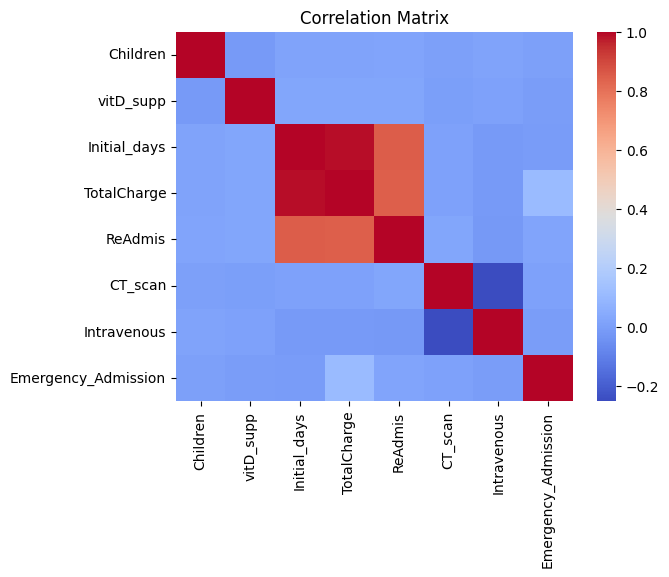

In [64]:
# Correlation matrix 
corr_matrix = medical_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

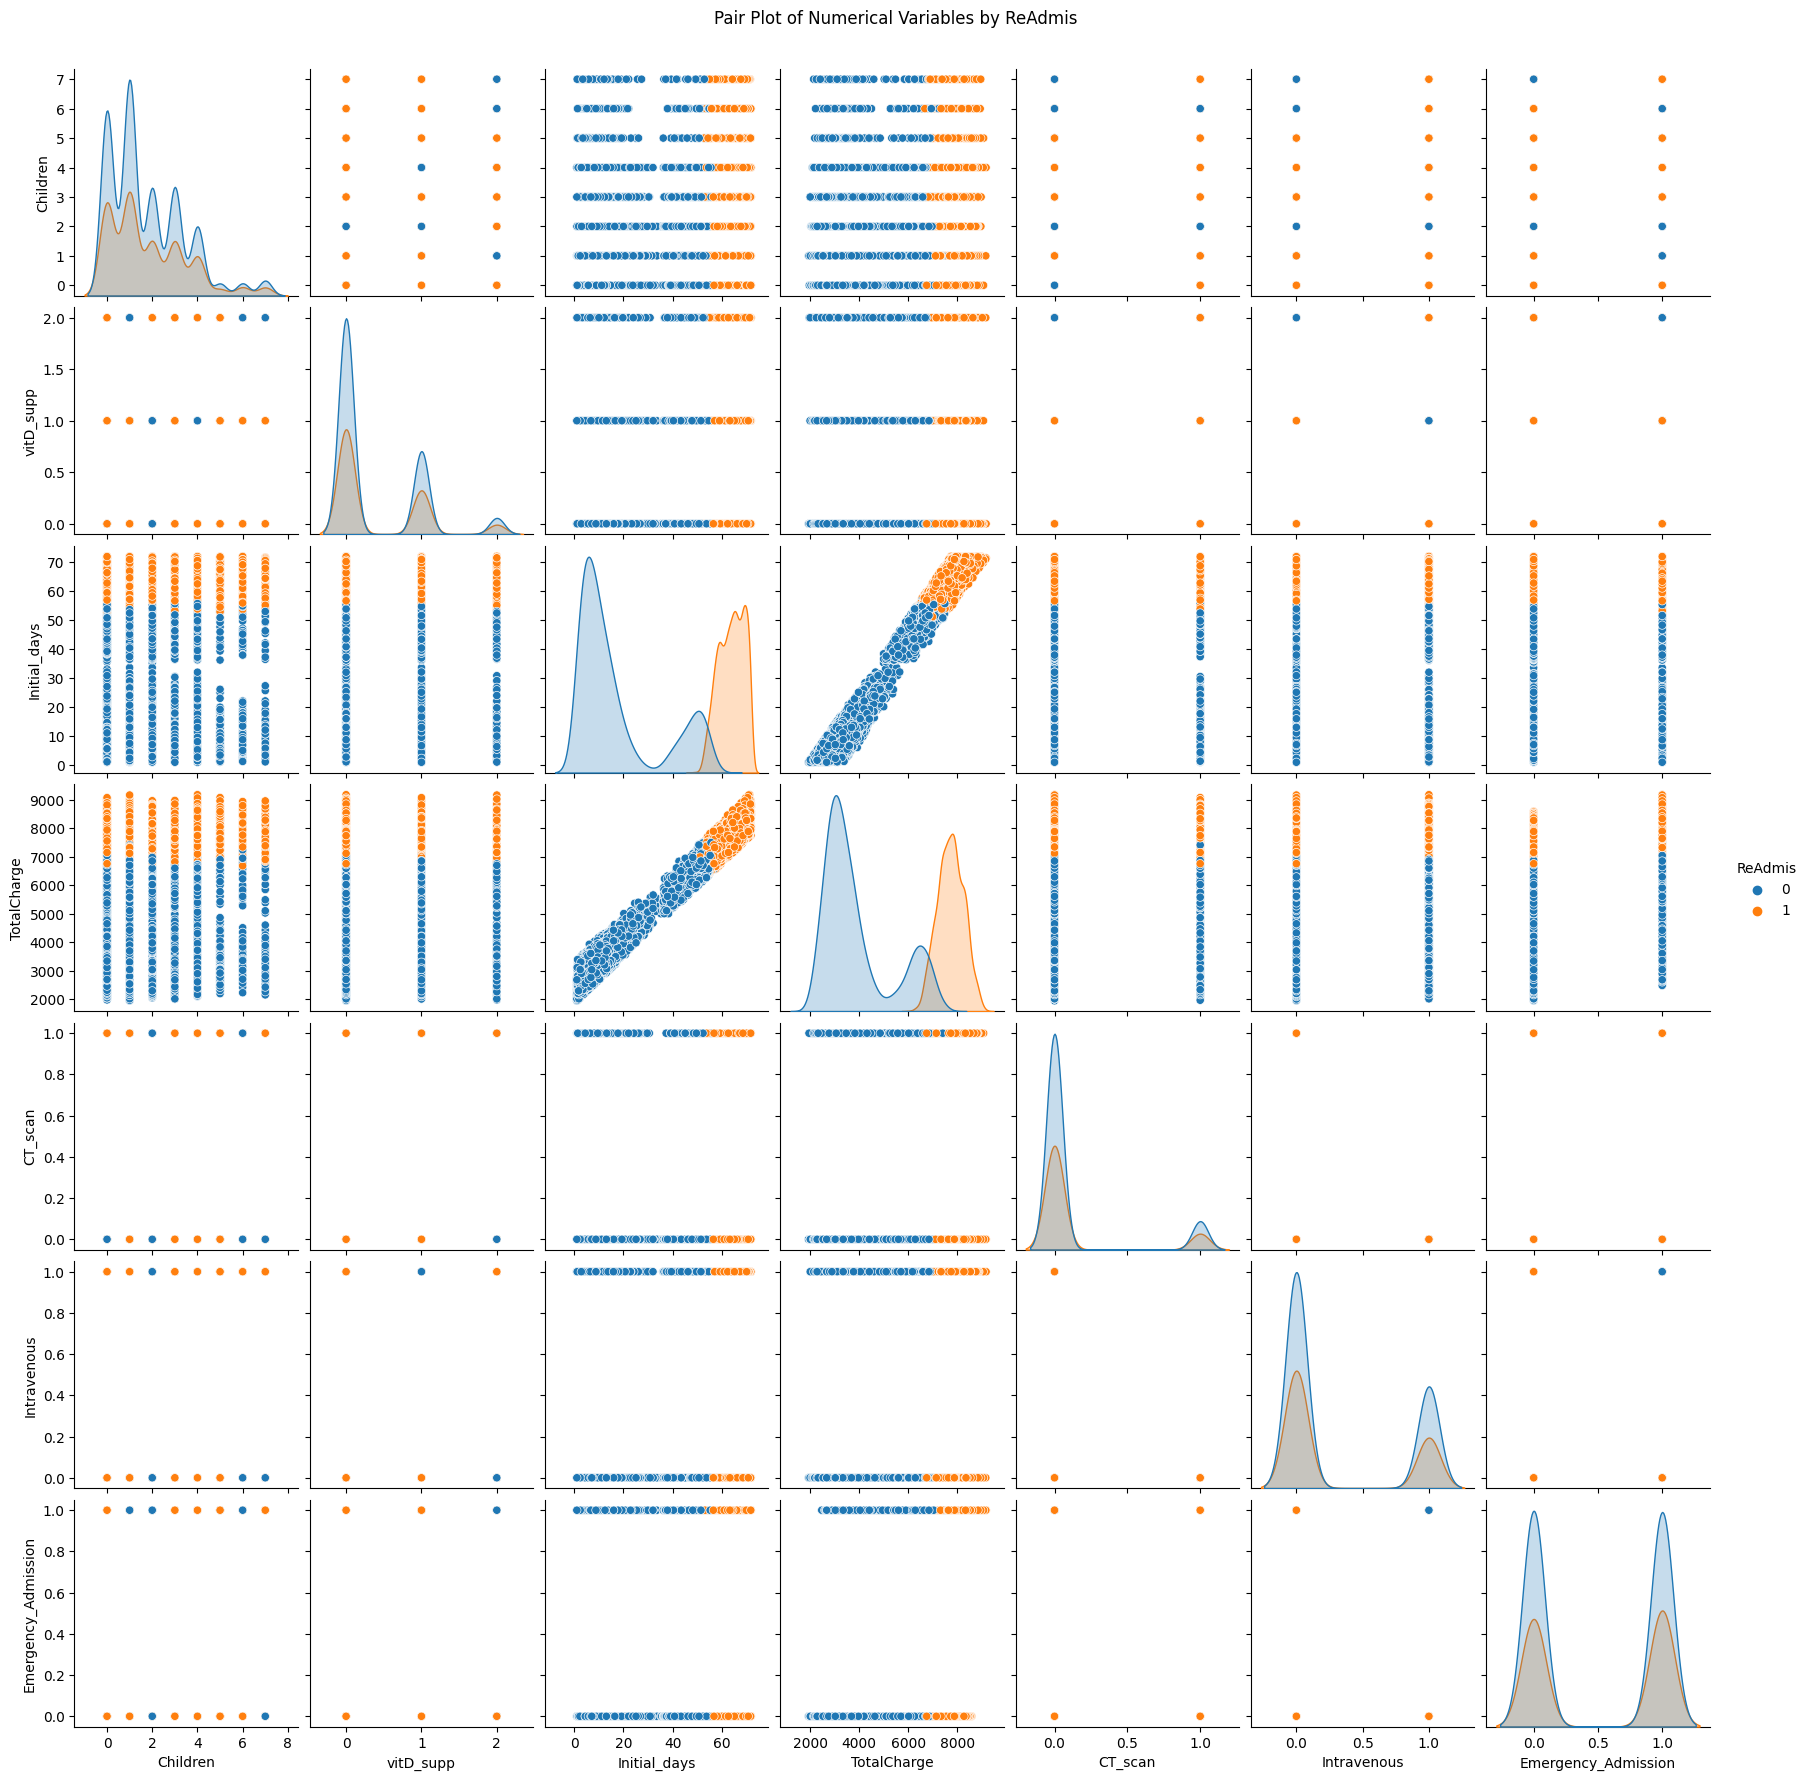

In [65]:
# Pairplot
sns.pairplot(data=medical_data, vars=['Children', 'vitD_supp', 'Initial_days', 'TotalCharge', 'CT_scan', 'Intravenous','Emergency_Admission'], hue='ReAdmis')
plt.suptitle("Pair Plot of Numerical Variables by ReAdmis", y=1.02)
plt.show()

In [66]:
# Splitting the data into test and train sets 
X = medical_data.drop('ReAdmis',axis=1)
y = medical_data['ReAdmis']

from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21, stratify=y)

In [67]:
# Export train/test sets
X_train.to_csv("C:/Users/Makayla Avendano/Desktop/X_train.csv")
X_test.to_csv("C:/Users/Makayla Avendano/Desktop/X_test.csv")
y_train.to_csv("C:/Users/Makayla Avendano/Desktop/y_train.csv")
y_test.to_csv("C:/Users/Makayla Avendano/Desktop/y_test.csv")

In [68]:
# Grid Search Cross Validation and Scaling a Pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

# Define variables 
X = medical_data.drop('ReAdmis',axis=1)
y = medical_data['ReAdmis']

# Setup the pipeline 
steps = [('scaler', StandardScaler()),
         ('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)

# Define train and test sets (80/20) 
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=21, stratify=y)

# Define parameters for KNN n_neighbors
parameters = {'knn__n_neighbors': np.arange(1,30)}

# Apply hyperparameter tuning (grid search cross validation)
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit the model 
cv.fit(X_train,y_train)

# Predict from the model
y_pred = cv.predict(X_test)

In [69]:
# Best performing n_neighbors value (k)
print("Best parameters:", cv.best_params_)
# Mean score for the top performing value of n_neighbors
print("Score:", cv.best_score_)

Best parameters: {'knn__n_neighbors': 4}
Score: 0.97075


In [70]:
# Accuracy score on the training model
print("The training accuracy is: ", cv.score(X_train,y_train))
# Accuracy score on the test model 
print("The testing accuracy is: ", cv.score(X_test, y_test))

The training accuracy is:  0.980375
The testing accuracy is:  0.9705


In [71]:
# Classification Report for the KNN model 
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1266
           1       0.97      0.95      0.96       734

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



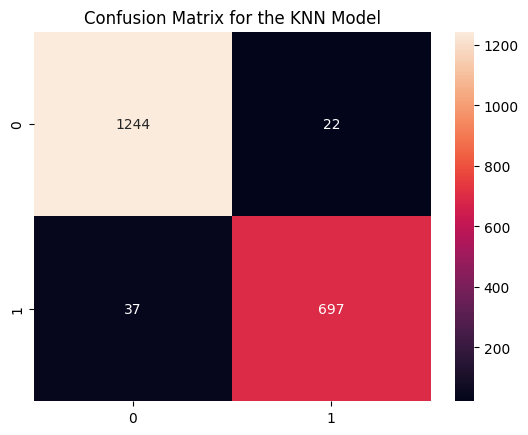

In [72]:
# Confusion Matrix and the plot 
cm = confusion_matrix(y_test,y_pred)
conf_matrix = sns.heatmap(cm, annot=True, fmt='d')
conf_matrix = plt.title("Confusion Matrix for the KNN Model")

In [73]:
# Area under the curve (AUC) for the KNN Model
print("The Area under the curve (AUC) for the KNN model:")
print(roc_auc_score(y_test, y_pred))

The Area under the curve (AUC) for the KNN model:
0.9661068567566754


# Results
The analysis technique that was used to analyze the data was the K-Nearest Neighbors. The first calculation performed to prepare the model was the imputation of outliers using the median. The maximum value was calculated using the equation Q3 + (1.5 * IQR) and the minimum was calculated using the equation Q1 – (1.5 * IQR). These calculations were performed and then the where function was used to replace all values above the maximum and below the minimum with the median. 

The next calculation performed was using SelectKBest to determine the best variables for the model. SelectKBest was used and then p-values were calculated and compared to indicate those with p-values below 0.05. 

The next calculation performed was using the KNeighborsClassifier to determine best parameters and the best score with the given parameters. The parameters that are being input into KNeighborsClassifier include the knn classifier, the number of neighbors, and the range of neighbors from 1 to 30. The best parameter and score was calculated using the GridSearchCV hyperparameter tuning. 

The accuracy score of the training and testing models were calculated along with the classification report, confusion matrix, and area under the curve for the KNN model. 

# Data Summary and Implications 
__Accuracy and AUC__<br>
The accuracy of the training model is 0.98 and the accuracy of the testing model is 0.97. Accuracy is, “the number of correct predictions made as a ration of all the predictions.” (Elleh, 2022) Given this definition, we can conclude that both the training and testing model are performing well and predicting data 98 to 97 percent accurate. Although this metric is useful, we can also look at the area under the curve (AUC) metric. “AUC is the measure of a classifier’s ability to distinguish between classes and is used as a summary of the ROC curve.”(Elleh, 2022) Essentially, we can look at the AUC metric as the metric that tells us how well our model is performing. This metric ranges from 0 to 1, with the values closer to 1 being a stronger model. The AUC was measured as 0.966 which is extremely high and indicates that our model is performing very well. 

“The basic idea of k-NN is to predict the label of any data point by looking at the ‘k’ closest labeled data point and getting them to vote on what the unlabeled point should have.” (Elleh, 2022) With a model accuracy score of 98 for the training model and 97 for the testing model, we can assume that those predictions are highly accurate and dependable. For this model, the SelectKBest feature selection method was used to determine which variables are preferred. This feature selection method picks the best variables and picks the highest p-values that are below 0.05. My results included a total of 7 variables which were used in the final model. 

GridSearchCV is the hyperparameter tuning method that was used to determine the best K value. The k that was determined was 4 and with this value of k the highest accuracy value would be 0.97 which is evident in the accuracy score of the testing model. Due to the accuracy being high, we can assume that hyperparameter tuning worked efficiently and reduced the risk of overfitting the model. (Bowne-Anderson, n.d)

One important limitation of this data analysis is the lack of equally distributed data. For the target variable readmission, the variable is not equally distributed and has 6331 that did not readmit to the hospital and the remaining 10,000 patients did readmit. It is important to note that this unequal distribution could affect the model and cause it to perform poorly. 

# Course of Action
Due to the positive results indicated in E2, we can use this model to recommend a course of action for the situation indicated in A1. Since this model performed well, this organization can use this model to predict readmission of patients. If this model can predict readmission of patients accurately, this organization can also use this information to potentially lower readmission of patients in the future. 